### Inteligencia Artificial 2025 - Lab 2

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import analisis

#### Ejercicio 3

Para dígitos en kilómetros cuadrados


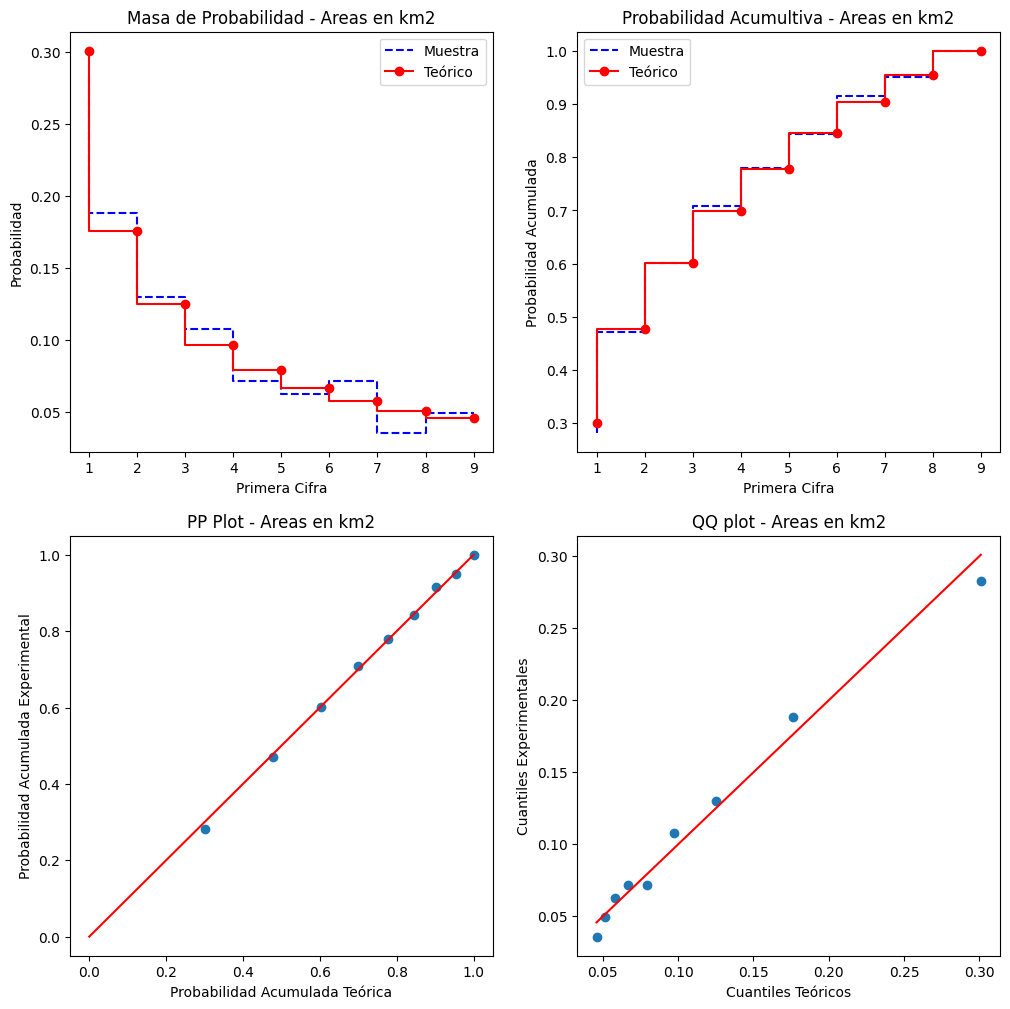

Para dígitos en Millas cuadradas


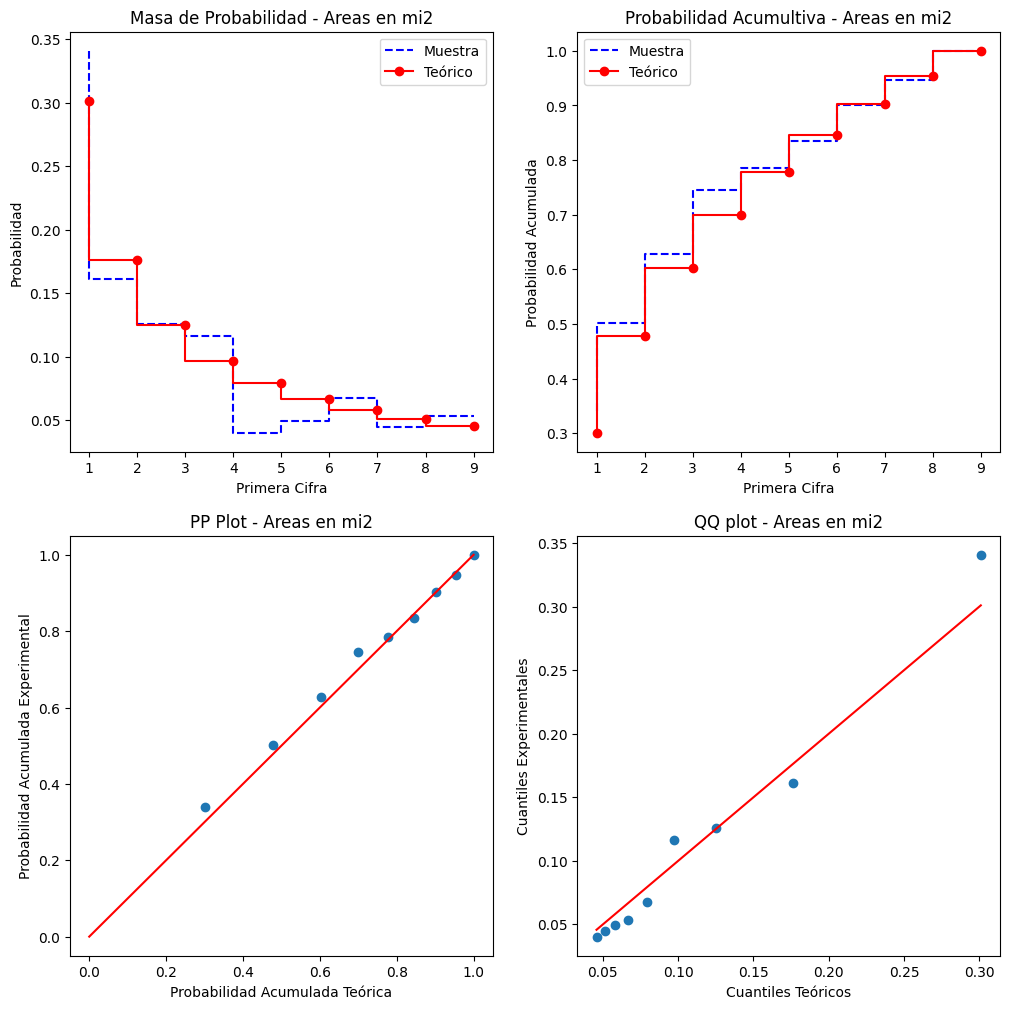

In [3]:
areas = pd.read_csv("areas.csv", sep=";")

print('Para dígitos en kilómetros cuadrados')
km_digit = areas['Area in square kilometres']
analisis.ej3_plots('Areas en km2',km_digit)

print('Para dígitos en Millas cuadradas')
mi_digit = areas['Area in square miles']
analisis.ej3_plots('Areas en mi2',mi_digit)